In [ ]:
from mpl_toolkits.mplot3d import axes3d # 3D figure
import matplotlib.pyplot as plt
plt.ion()
%matplotlib widget


from matplotlib import cm
from matplotlib import rc
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
import math
import scipy.interpolate as interpolate
import scipy.signal as signal
from scipy.optimize import curve_fit

from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as tck
import scipy.io as sio
import pandas as pd
import matplotlib.ticker as ticker

import os

from pylab import *
from numpy import *
from matplotlib.widgets import Button
from matplotlib import rc


import glob
import csv
params={'axes.labelsize':20,'xtick.labelsize':15,'ytick.labelsize':15}
rcParams.update(params)

In [ ]:
# Colour Palette
rcParams["axes.prop_cycle"]=cycler(color=['#68246D', '#FFD53A', '#00AEEF', '#BE1E2D', '#AFA961'])


In [ ]:
# # Load data

# memory_pump_off = np.loadtxt('Data/Cesium data/2024_05_pumping_data/20240530/C330May_hot_pumpoff00000.csv', delimiter=',', skiprows=5)
# memory_pump_on = np.loadtxt('Data/Cesium data/2024_05_pumping_data/20240530/C330May_hot_pumpon00000.csv', delimiter=',', skiprows=5)

# reference_pump_off = np.loadtxt('Data/Cesium data/2024_05_pumping_data/20240530/C230May_hot_pumpoff00000.csv', delimiter=',', skiprows=5)
# reference_pump_on = np.loadtxt('Data/Cesium data/2024_05_pumping_data/20240530/C230May_hot_pumpon00000.csv', delimiter=',', skiprows=5)

# time_memory = memory_pump_off[:,0]
# time_reference = reference_pump_off[:,0]

# memory_pump_off = memory_pump_off[:,1]
# memory_pump_on = memory_pump_on[:,1]

# reference_pump_off = reference_pump_off[:,1]
# reference_pump_on = reference_pump_on[:,1]

In [ ]:



# memory_pump_off = np.loadtxt('Data/Cesium data/04062024/240604-PUMP-NoPum2_4.csv', delimiter=',', skiprows=2, )
# reference_pump_off = np.loadtxt('Data/Cesium data/04062024/240604-PUMP-NoPum2_3.csv', delimiter=',', skiprows=2)

# memory_pump_on = np.loadtxt('Data/Cesium data/04062024/240604-PUMP-WithPum2_4.csv', delimiter=',', skiprows=2)
# reference_pump_on = np.loadtxt('Data/Cesium data/04062024/240604-PUMP-WithPum2_3.csv', delimiter=',', skiprows=2)


# time_memory = memory_pump_off[:,0]
# time_reference = reference_pump_off[:,0]

# memory_pump_off = memory_pump_off[:,1]
# memory_pump_on = memory_pump_on[:,1]

# reference_pump_off = reference_pump_off[:,1]
# reference_pump_on = reference_pump_on[:,1]



In [65]:
df_memory_pump_off = pd.read_csv('Data/Cesium data/04062024/240604-PUMP-NoPum2_4.csv', skiprows=1)
df_memory_pump_on = pd.read_csv('Data/Cesium data/04062024/240604-PUMP-WithPum2_4.csv', skiprows=1)
df_reference_pump_off = pd.read_csv('Data/Cesium data/04062024/240604-PUMP-NoPum2_3.csv', skiprows=1)
df_reference_pump_on = pd.read_csv('Data/Cesium data/04062024/240604-PUMP-WithPum2_3.csv', skiprows=1)

df_memory_pump_off = df_memory_pump_off.dropna()
df_memory_pump_on = df_memory_pump_on.dropna()
df_reference_pump_off = df_reference_pump_off.dropna()
df_reference_pump_on = df_reference_pump_on.dropna()

memory_pump_off = df_memory_pump_off['Volt'].values[0:15000]
memory_pump_on = df_memory_pump_on['Volt'].values[0:15000]
reference_pump_off = df_reference_pump_off['Volt'].values[0:15000]
reference_pump_on = df_reference_pump_on['Volt'].values[0:15000]

time_memory_off = df_memory_pump_off['second'].values.astype(float)[0:15000]
time_memory_on = df_memory_pump_on['second'].values.astype(float)[0:15000]
time_reference_off = df_reference_pump_off['second'].values.astype(float)[0:15000]
time_reference_on = df_reference_pump_on['second'].values.astype(float)[0:15000]


In [71]:
time_memory = np.linspace(0, 1, 15000)

In [68]:
time_memory_on

array([-0.12125  , -0.1212372, -0.1212244, ...,  0.0707116,  0.0707244,
        0.0707372])

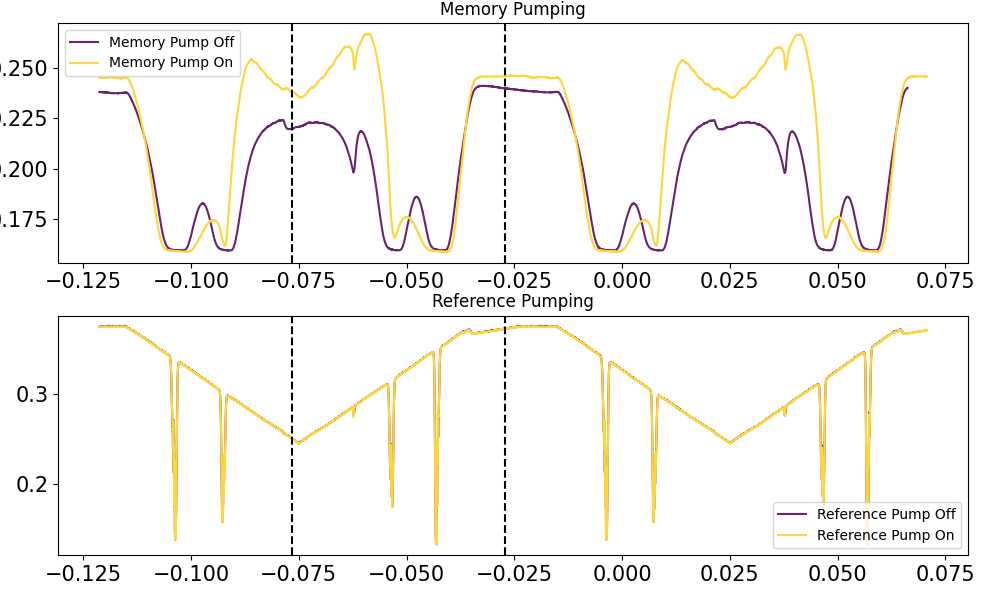

In [73]:
crop_start_on = np.where(time_memory_on > -0.0754)[0][0]
crop_end_on = np.where(time_memory_on > -0.0248)[0][0]

crop_start_off = np.where(time_memory_off > -0.0754)[0][0]
crop_end_off = np.where(time_memory_off > -0.0248)[0][0]

# Plot data
fig, ax = plt.subplots(2,1, figsize=(10,6))
fig.tight_layout()
ax[0].plot(time_memory_off, memory_pump_off, label='Memory Pump Off')
ax[0].plot(time_memory_on, memory_pump_on, label='Memory Pump On')
ax[0].axvline(time_memory_off[crop_start_on], color='k', linestyle='--')
ax[0].axvline(time_memory_off[crop_end_on], color='k', linestyle='--')
ax[0].set_title('Memory Pumping')
ax[0].legend()
ax[1].plot(time_reference_off, reference_pump_off, label='Reference Pump Off')
ax[1].plot(time_reference_on, reference_pump_on, label='Reference Pump On')
ax[1].axvline(time_reference_off[crop_start_on], color='k', linestyle='--')
ax[1].axvline(time_reference_off[crop_end_on], color='k', linestyle='--')
ax[1].set_title('Reference Pumping')
ax[1].legend()


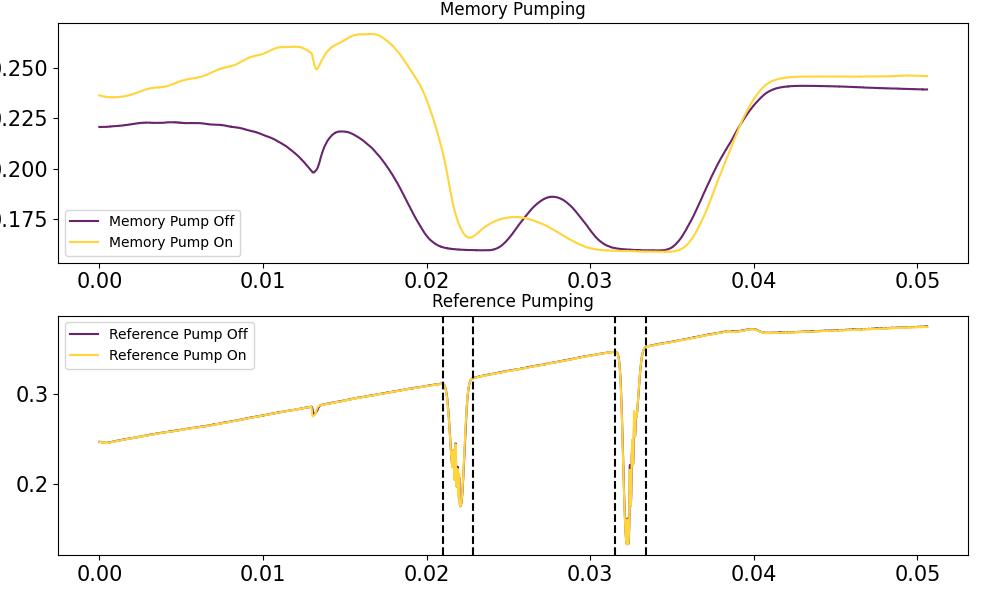

In [98]:
# Crop data
time_reference_cropped_on = time_reference_on[crop_start_on:crop_end_on]
time_reference_cropped_off = time_reference_off[crop_start_off:crop_end_off]
time_memory_cropped_on = time_memory_on[crop_start_on:crop_end_on]
time_memory_cropped_off = time_memory_off[crop_start_off:crop_end_off]
memory_pump_off_cropped = memory_pump_off[crop_start_off:crop_end_off]
memory_pump_on_cropped = memory_pump_on[crop_start_on:crop_end_on]
reference_pump_off_cropped = reference_pump_off[crop_start_off:crop_end_off]
reference_pump_on_cropped = reference_pump_on[crop_start_on:crop_end_on]


time_memory_cropped_on = time_memory_cropped_on - time_memory_cropped_on[0]
time_memory_cropped_off = time_memory_cropped_off - time_memory_cropped_off[0]
time_reference_cropped_on = time_reference_cropped_on - time_reference_cropped_on[0]
time_reference_cropped_off = time_reference_cropped_off - time_reference_cropped_off[0]

# Hyperfine regions
# F3 
F3_start_off = np.where(time_reference_cropped_off > 0.021)[0][0]
F3_end_off = np.where(time_reference_cropped_off > 0.0228)[0][0]

# F4
F4_start_off = np.where(time_reference_cropped_off > 0.0315)[0][0]
F4_end_off = np.where(time_reference_cropped_off > 0.0334)[0][0]

# F3
F3_start_on = np.where(time_reference_cropped_on > 0.021)[0][0]
F3_end_on = np.where(time_reference_cropped_on > 0.0228)[0][0]

# F4
F4_start_on = np.where(time_reference_cropped_on > 0.0315)[0][0]
F4_end_on = np.where(time_reference_cropped_on > 0.0334)[0][0]

# Plot cropped data
fig, ax = plt.subplots(2,1, figsize=(10,6))
fig.tight_layout()
ax[0].plot(time_memory_cropped_off, memory_pump_off_cropped, label='Memory Pump Off')
ax[0].plot(time_memory_cropped_on, memory_pump_on_cropped, label='Memory Pump On')
ax[0].set_title('Memory Pumping')
ax[0].legend()
ax[1].plot(time_reference_cropped_off, reference_pump_off_cropped, label='Reference Pump Off')
ax[1].plot(time_reference_cropped_on, reference_pump_on_cropped, label='Reference Pump On')
ax[1].axvline(time_reference_cropped_off[F3_start_off], color='k', linestyle='--')
ax[1].axvline(time_reference_cropped_off[F3_end_off], color='k', linestyle='--')
ax[1].axvline(time_reference_cropped_off[F4_start_off], color='k', linestyle='--')
ax[1].axvline(time_reference_cropped_off[F4_end_off], color='k', linestyle='--')
ax[1].set_title('Reference Pumping')
ax[1].legend()



In [59]:
# Frequency domain

D2_main_freq = 351.72571850e12
F3_rel_freq = -5.170855e9
F4_rel_freq = 4.021776e9

F2prime =  - 339.64e6
F3prime =  - 188.44e6
F4prime =  - 12.815e6
F5prime =  + 263.81e6

F3toF2 = F3_rel_freq + F2prime
F3toF3 = F3_rel_freq + F3prime
F3toF4 = F3_rel_freq + F4prime
F3toF5 = F3_rel_freq + F5prime

F4toF2 = F4_rel_freq + F2prime
F4toF3 = F4_rel_freq + F3prime
F4toF4 = F4_rel_freq + F4prime
F4toF5 = F4_rel_freq + F5prime




D2_line_F3 = np.array([F3toF2, F3toF3, F3toF4, F3toF5])/1e9
D2_line_F4 = np.array([F4toF2, F4toF3, F4toF4, F4toF5])/1e9

print(D2_line_F3)
print(D2_line_F4)

[-5.510495 -5.359295 -5.18367  -4.907045]
[3.682136 3.833336 4.008961 4.285586]


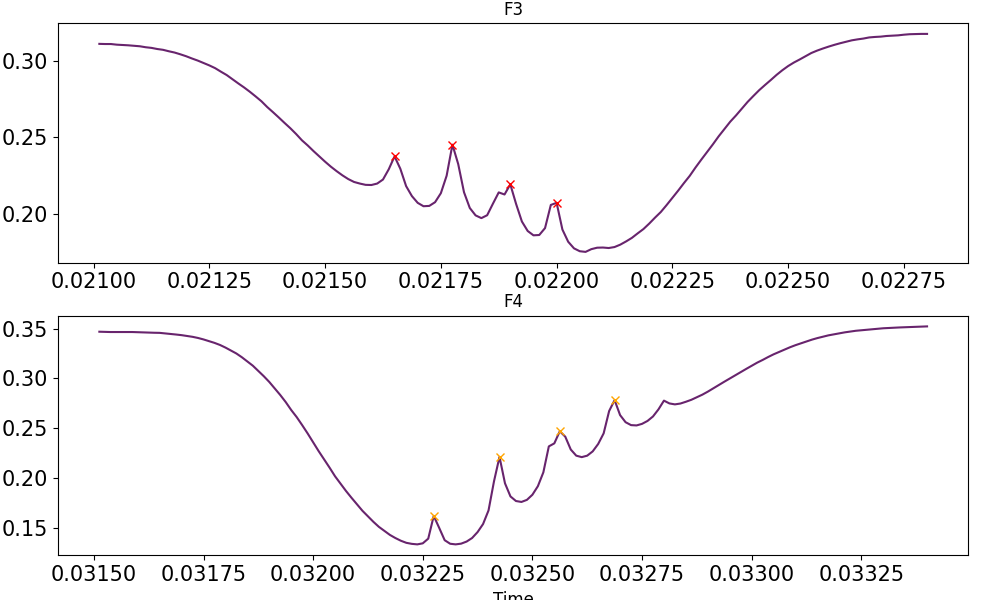

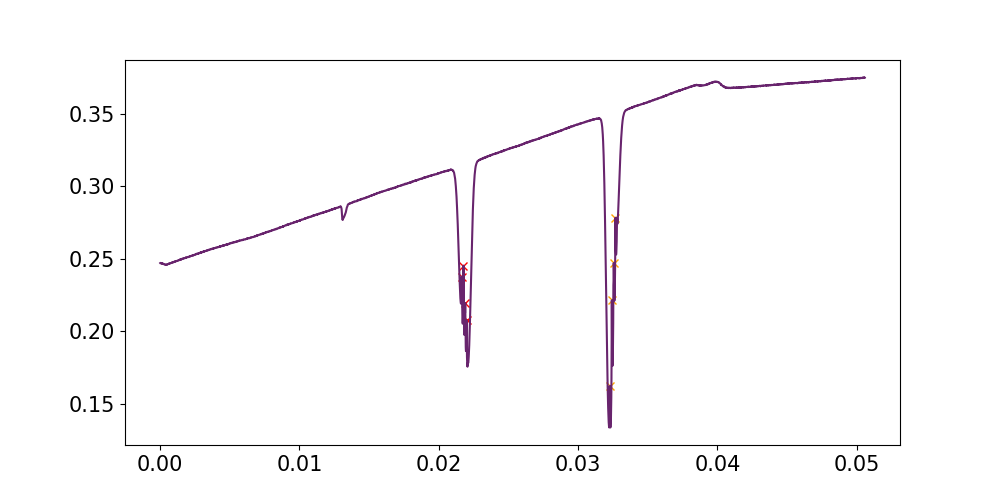

In [99]:
# Smoothen data before finding dips
# spectrum_reference_smooth = signal.savgol_filter(reference_pump_off_cropped, 100, 1)
spectrum_reference_smooth_off = reference_pump_off_cropped
spectrum_reference_smooth_on = reference_pump_on_cropped


# Regions

F3_reference_off = spectrum_reference_smooth_off[F3_start_off:F3_end_off]
F4_reference_off = spectrum_reference_smooth_off[F4_start_off:F4_end_off]
F3_time_off = time_reference_cropped_off[F3_start_off:F3_end_off]
F4_time_off = time_reference_cropped_off[F4_start_off:F4_end_off]

F3_reference_on = spectrum_reference_smooth_on[F3_start_on:F3_end_on]
F4_reference_on = spectrum_reference_smooth_on[F4_start_on:F4_end_on]
F3_time_on = time_reference_cropped_on[F3_start_on:F3_end_on]
F4_time_on = time_reference_cropped_on[F4_start_on:F4_end_on]



# Find the dips in the reference cell data 
dips_referenceF3_off, _ = signal.find_peaks(F3_reference_off, prominence = 0.004, distance=1)
dips_referenceF4_off, _ = signal.find_peaks(F4_reference_off, prominence = 0.004, distance=1)

dips_referenceF3_on, _ = signal.find_peaks(F3_reference_on, prominence = 0.004, distance=1)
dips_referenceF4_on, _ = signal.find_peaks(F4_reference_on, prominence = 0.004, distance=1)



   


# Plot dips
fig, ax = plt.subplots(2,1, figsize=(10,6))
fig.tight_layout()
ax[0].plot(F3_time_off, F3_reference_off)
ax[0].plot(F3_time_off[dips_referenceF3_off], F3_reference_off[dips_referenceF3_off], 'x', label='Dips', color='red')
ax[0].set_title('F3')
ax[0].set_ylabel('Voltage', fontsize=12)
ax[1].plot(F4_time_off, F4_reference_off)
ax[1].plot(F4_time_off[dips_referenceF4_off], F4_reference_off[dips_referenceF4_off], 'x', label='Dips', color='orange')
ax[1].set_title('F4')
ax[1].set_ylabel('Voltage', fontsize=12)
ax[1].set_xlabel('Time', fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(F3_time_off[dips_referenceF3_off], F3_reference_off[dips_referenceF3_off], 'x', label='Dips', color='red')
plt.plot(F4_time_off[dips_referenceF4_off], F4_reference_off[dips_referenceF4_off], 'x', label='Dips', color='orange')
plt.plot(time_reference_cropped_off, spectrum_reference_smooth_off)

# plt.plot(freq_array, Rb_spectrum_reference_smooth, label='Reference cell')
# plt.plot(freq_array[dips_reference], Rb_spectrum_reference_smooth[dips_reference], 'x', label='Dips', color='red')
plt.show()

# Get detuning of fit from actual frequencies
# detuning_array = freq_array[dips_reference] - freq_Rb
# detuning = norm(detuning_array)
# print('Detuning of fit from actual frequencies in MHz: ', detuning*10**3)


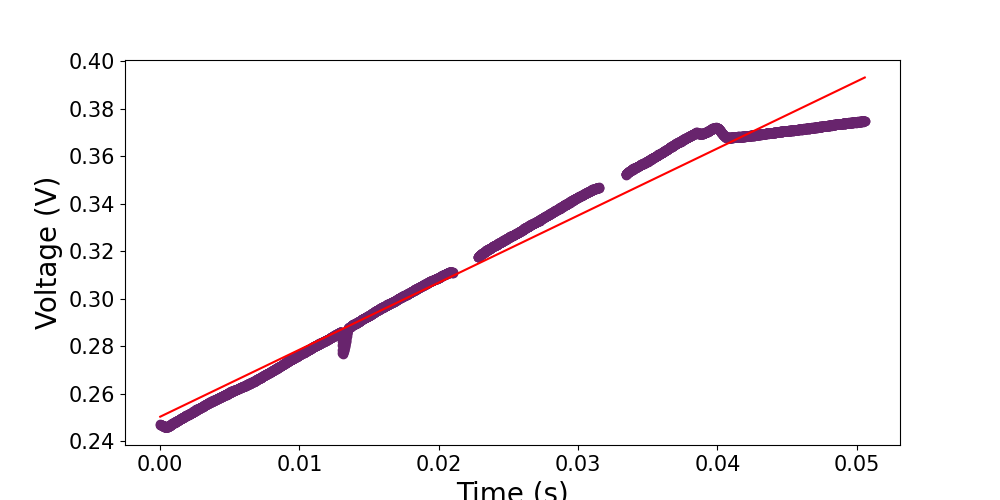

In [100]:
# Take data corresponding to off-resonant frequencies for reference

# For subset
transmission_a_reference_on = spectrum_reference_smooth_on[:F3_start_on]
transmission_b_to_c_reference_on = spectrum_reference_smooth_on[F3_end_on:F4_start_on]
transmission_d_reference_on = spectrum_reference_smooth_on[F4_end_on:]

transmission_a_reference_off = spectrum_reference_smooth_off[:F3_start_off]
transmission_b_to_c_reference_off = spectrum_reference_smooth_off[F3_end_off:F4_start_off]
transmission_d_reference_off = spectrum_reference_smooth_off[F4_end_off:]





# Bundle all transmissions together
# For subset
off_resonant_time_reference_off = np.concatenate([time_reference_cropped_off[:F3_start_off], time_reference_cropped_off[F3_end_off:F4_start_off], 
                                              time_reference_cropped_off[F4_end_off:]])
off_resonant_transmission_reference_off = np.concatenate([transmission_a_reference_off, transmission_b_to_c_reference_off, transmission_d_reference_off])

off_resonant_time_reference_on = np.concatenate([time_reference_cropped_on[:F3_start_on], time_reference_cropped_on[F3_end_on:F4_start_on],
                                                time_reference_cropped_on[F4_end_on:]])
off_resonant_transmission_reference_on = np.concatenate([transmission_a_reference_on, transmission_b_to_c_reference_on, transmission_d_reference_on])


# For whole data set
# off_resonant_time_reference = np.concatenate([Time[:point_A], Time[point_B:point_C], Time[point_D:point_E], Time[point_F:mirror_point_F], 
#                                             Time[mirror_point_E:mirror_point_D], Time[mirror_point_C:mirror_point_B], Time[mirror_point_A:]])

# off_resonant_transmission_reference = np.concatenate([transmission_a_reference, transmission_b_to_c_reference, transmission_d_to_e_reference, transmission_f_reference,
#                                                       transmission_e_to_d_reference,transmission_c_to_b_reference, transmission_a_m_reference])



# off_resonant_time_reference = np.concatenate([Time_cropped[:point_A], Time_cropped[point_B:point_C], Time_cropped[point_D:point_E], Time_cropped[point_F:]])
# off_resonant_transmission_reference = np.concatenate([Rb_spectrum_reference_smooth[:point_A], Rb_spectrum_reference_smooth[point_B:point_C], Rb_spectrum_reference_smooth[point_D:point_E], Rb_spectrum_reference_smooth[point_F:]])



# Apply polyfit to off resonant data
p_reference_off = np.polyfit(off_resonant_time_reference_off, off_resonant_transmission_reference_off, 1)
p_reference_on = np.polyfit(off_resonant_time_reference_on, off_resonant_transmission_reference_on, 1)


# Plot polyfit
plt.figure(figsize=(10, 5))
plt.scatter(off_resonant_time_reference_off, off_resonant_transmission_reference_off)
plt.plot(off_resonant_time_reference_off, np.polyval(p_reference_off, off_resonant_time_reference_off), color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()





In [101]:
# dips_referenceF3 = np.array([16, 19, 22, 25])
# dips_referenceF4 = np.array([13, 17, 20, 23])


# Get dip index for full data
dips_referenceF3_full_off = dips_referenceF3_off + F3_start_off 
dips_referenceF4_full_off = dips_referenceF4_off + F4_start_off

dips_referenceF3_full_on = dips_referenceF3_on + F3_start_on
dips_referenceF4_full_on = dips_referenceF4_on + F4_start_on


# Linear fit to the dips
dips_reference_off = np.concatenate((dips_referenceF3_full_off, dips_referenceF4_full_off))
dips_reference_on = np.concatenate((dips_referenceF3_full_on, dips_referenceF4_full_on))
D2_line = np.concatenate((D2_line_F3, D2_line_F4))


freq_arrayF3_off = np.polyval(np.polyfit(dips_referenceF3_off, D2_line_F3, 1), np.linspace(0, len(F3_reference_off), len(F3_reference_off)))
freq_arrayF4_off = np.polyval(np.polyfit(dips_referenceF4_off, D2_line_F4, 1), np.linspace(0, len(F4_reference_off), len(F4_reference_off)))

freq_arrayF3_on = np.polyval(np.polyfit(dips_referenceF3_on, D2_line_F3, 1), np.linspace(0, len(F3_reference_on), len(F3_reference_on)))
freq_arrayF4_on = np.polyval(np.polyfit(dips_referenceF4_on, D2_line_F4, 1), np.linspace(0, len(F4_reference_on), len(F4_reference_on)))

freq_array_off = np.polyval(np.polyfit(dips_reference_off, D2_line, 1), np.linspace(0, len(spectrum_reference_smooth_off), len(spectrum_reference_smooth_off)))
freq_array_on = np.polyval(np.polyfit(dips_reference_on, D2_line, 1), np.linspace(0, len(spectrum_reference_smooth_on), len(spectrum_reference_smooth_on)))

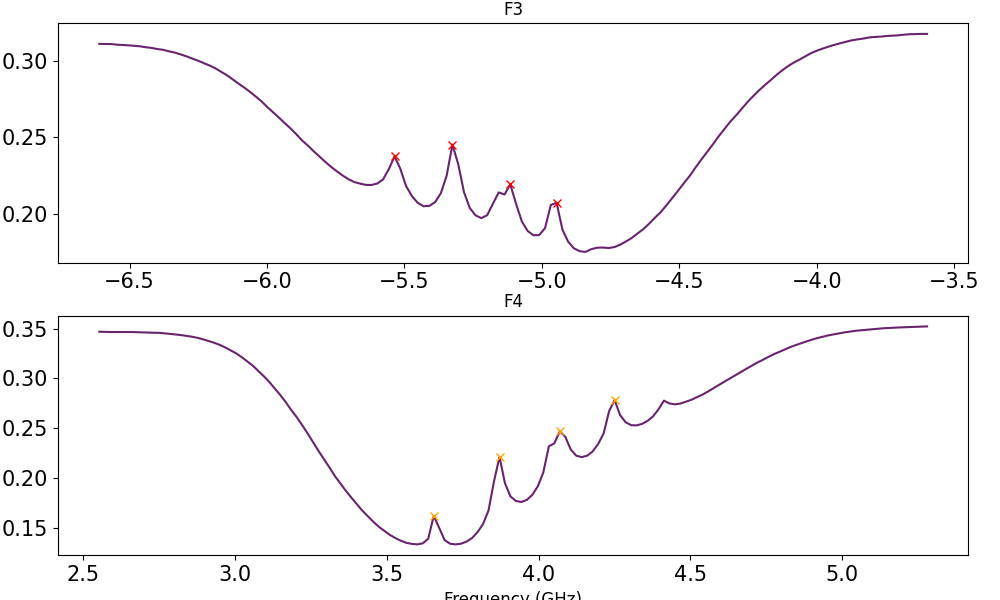

In [102]:
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=False)
fig.tight_layout()
ax[0].plot(freq_arrayF3_off, F3_reference_off)
ax[0].plot(freq_arrayF3_off[dips_referenceF3_off], F3_reference_off[dips_referenceF3_off], 'x', label='Dips', color='red')
ax[0].set_title('F3')
ax[0].set_ylabel('Voltage', fontsize=12)
ax[1].plot(freq_arrayF4_off, F4_reference_off)
ax[1].plot(freq_arrayF4_off[dips_referenceF4_off], F4_reference_off[dips_referenceF4_off], 'x', label='Dips', color='orange')
ax[1].set_title('F4')
ax[1].set_ylabel('Voltage', fontsize=12)
ax[1].set_xlabel('Frequency (GHz)', fontsize=12)
plt.show()

### Non pump

In [ ]:
# # Define transmission regions
# point_A = np.where(freq_array > -13)[0][0]
# point_B = np.where(freq_array > -0.6)[0][0]
# point_C = np.where(freq_array > 0.2)[0][0]
# point_D = np.where(freq_array > 12)[0][0]


# zero_A = np.where(freq_array > -5.5)[0][0]
# zero_B = np.where(freq_array > -3.7)[0][0]
# zero_C = np.where(freq_array > 3.5)[0][0]
# zero_D = np.where(freq_array > 5.6)[0][0]


# # Plot with points
# plt.figure(figsize=(10, 5))
# plt.plot(freq_array, memory_pump_off_cropped, label='Memory cell')
# plt.axvline(x=freq_array[point_A], color='k', linestyle='--')
# plt.axvline(x=freq_array[point_B], color='k', linestyle='--')
# plt.axvline(x=freq_array[point_C], color='k', linestyle='--')
# plt.axvline(x=freq_array[point_D], color='k', linestyle='--')

# plt.axvline(x=freq_array[zero_A], color='r', linestyle='--')
# plt.axvline(x=freq_array[zero_B], color='r', linestyle='--')
# plt.axvline(x=freq_array[zero_C], color='r', linestyle='--')
# plt.axvline(x=freq_array[zero_D], color='r', linestyle='--')

# plt.xlabel('Frequency (GHz)')
# plt.ylabel('Voltage (V)')
# plt.legend()
# plt.show()

In [ ]:
# transmission_zero_a_to_b_memory = memory_pump_off_cropped[zero_A:zero_B]
# transmission_zero_c_to_d_memory = memory_pump_off_cropped[zero_C:zero_D]


# # Sub set
# zero_transmission_memory = np.concatenate([transmission_zero_a_to_b_memory, transmission_zero_c_to_d_memory])
# zero_time_memory = np.concatenate([time_memory_cropped[zero_A:zero_B], time_memory_cropped[zero_C:zero_D]])



# p_zero_memory = np.polyfit(zero_time_memory, zero_transmission_memory, 2)

# # Sub set
# # Rb_spectrum_memory_zero = Rb_spectrum_memory_cropped[:, 1] - np.polyval(p_zero_memory, Time_cropped)
# spectrum_memory_zero = memory_pump_off_cropped - np.mean(zero_transmission_memory)







# # Rb_spectrum_memory_smooth = signal.savgol_filter(Rb_spectrum_memory_zero, 100, 2)
# spectrum_memory_smooth = spectrum_memory_zero


# # Plot polyfit
# plt.figure(figsize=(10, 5))
# plt.scatter(zero_time_memory, zero_transmission_memory)
# plt.plot(zero_time_memory, np.polyval(p_zero_memory, zero_time_memory), color='r')
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage (V)')
# plt.show()

# # Plot smoothed data
# plt.figure(figsize=(10,5))
# plt.plot(time_memory_cropped, spectrum_memory_smooth, label='Memory cell')
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage (V)')
# plt.legend()
# plt.show()


In [ ]:
# # Take data corresponding to off-resonant frequencies

# transmission_a_memory = spectrum_memory_smooth[:point_A]
# # transmission_b_to_c_memory = spectrum_memory_smooth[point_B:point_C]
# transmission_d_memory = spectrum_memory_smooth[point_D:]

# # transmission_a_reference = Rb_spectrum_reference_cropped[:point_A, 1]
# # transmission_b_to_c_reference = Rb_spectrum_reference_cropped[point_B:point_C, 1]
# # transmission_d_to_e_reference = Rb_spectrum_reference_cropped[point_D:point_E, 1]
# # transmission_f_reference = Rb_spectrum_reference_cropped[point_F:, 1]

# # If no y-axis offset
# # Rb_spectrum_memory_smooth = signal.savgol_filter(Rb_spectrum_memory[:, 1], 100, 2)

# # Long range
# off_resonant_time_memory = np.concatenate([time_memory_cropped[:point_A], time_memory_cropped[point_D:]])
# off_resonant_transmission_memory = np.concatenate([transmission_a_memory, transmission_d_memory])

# # off_resonant_time_memory = np.concatenate([time_memory_cropped[:point_A], time_memory_cropped[point_B:point_C], time_memory_cropped[point_D:]])
# # off_resonant_transmission_memory = np.concatenate([spectrum_memory_smooth[:point_A], spectrum_memory_smooth[point_B:point_C], 
# #                                                    spectrum_memory_smooth[point_D:]])

# # off_resonant_time_memory = Time_cropped[:point_A]
# # off_resonant_transmission_memory = Rb_spectrum_memory_smooth[:point_A]







# # Apply polyfit to off resonant data
# p_memory = np.polyfit(off_resonant_time_memory, off_resonant_transmission_memory, 1)


# # Plot polyfit
# plt.figure(figsize=(10, 5))
# plt.scatter(off_resonant_time_memory, off_resonant_transmission_memory)
# plt.plot(time_memory_cropped, np.polyval(p_memory, time_memory_cropped), color='r')
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage (V)')
# plt.show()







### Pump

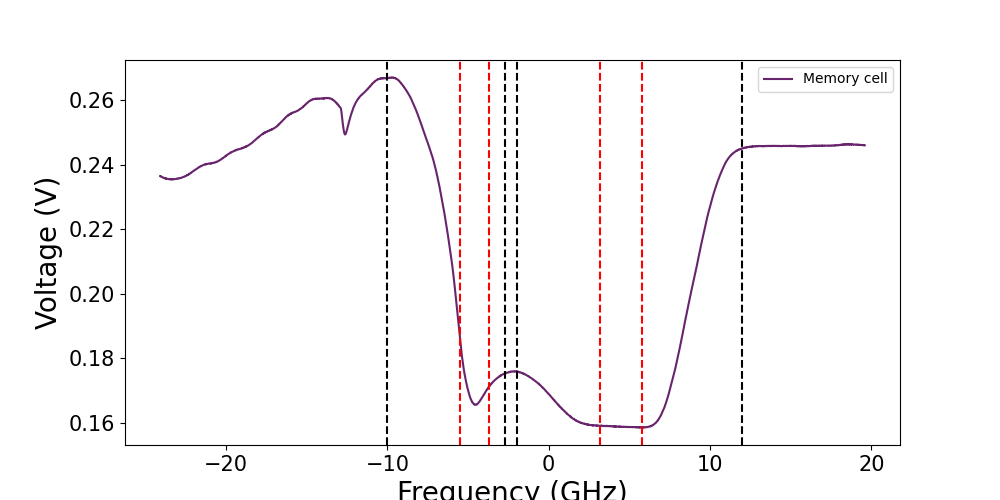

In [127]:
# Define transmission regions
point_A = np.where(freq_array_on > -10)[0][0]
point_B = np.where(freq_array_on > -2.7)[0][0]
point_C = np.where(freq_array_on > -2)[0][0]
point_D = np.where(freq_array_on > 12)[0][0]


zero_A = np.where(freq_array_on > -5.5)[0][0]
zero_B = np.where(freq_array_on > -3.7)[0][0]
zero_C = np.where(freq_array_on > 3.2)[0][0]
zero_D = np.where(freq_array_on > 5.8)[0][0]


# Plot with points
plt.figure(figsize=(10, 5))
plt.plot(freq_array_on, memory_pump_on_cropped, label='Memory cell')
plt.axvline(x=freq_array_on[point_A], color='k', linestyle='--')
plt.axvline(x=freq_array_on[point_B], color='k', linestyle='--')
plt.axvline(x=freq_array_on[point_C], color='k', linestyle='--')
plt.axvline(x=freq_array_on[point_D], color='k', linestyle='--')

plt.axvline(x=freq_array_on[zero_A], color='r', linestyle='--')
plt.axvline(x=freq_array_on[zero_B], color='r', linestyle='--')
plt.axvline(x=freq_array_on[zero_C], color='r', linestyle='--')
plt.axvline(x=freq_array_on[zero_D], color='r', linestyle='--')

plt.xlabel('Frequency (GHz)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

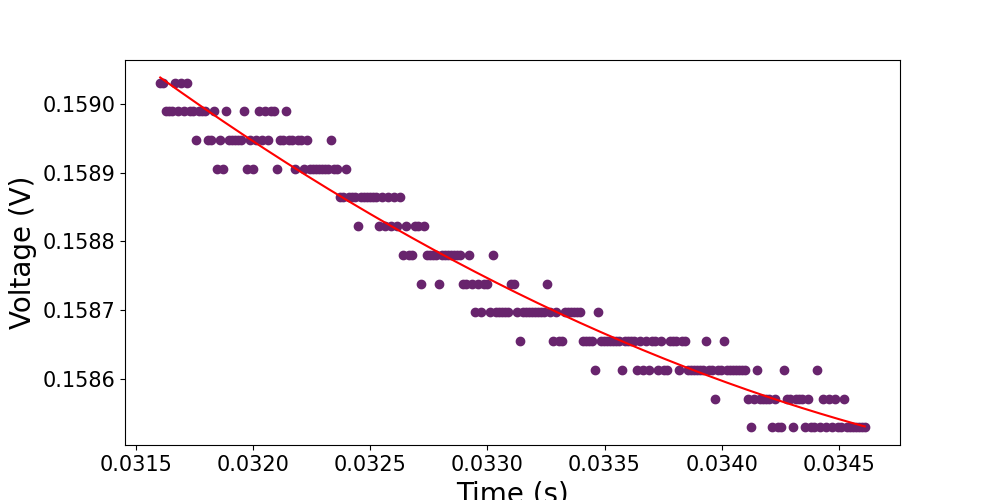

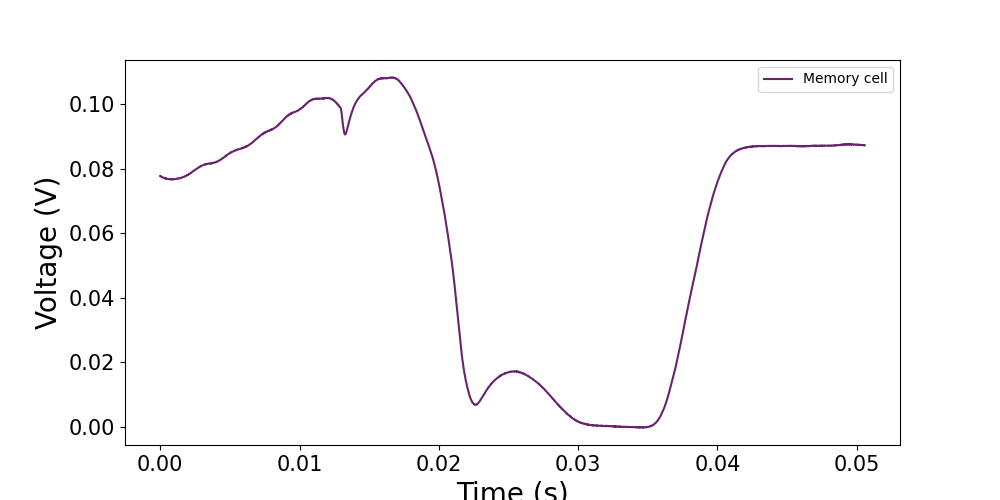

In [110]:
transmission_zero_c_to_d_memory_on = memory_pump_on_cropped[zero_C:zero_D]




# Pump data
zero_transmission_memory_on = transmission_zero_c_to_d_memory_on
zero_time_memory_on = time_memory_cropped_on[zero_C:zero_D]


p_zero_memory = np.polyfit(zero_time_memory_on, zero_transmission_memory_on, 2)

# Sub set
# Rb_spectrum_memory_zero = Rb_spectrum_memory_cropped[:, 1] - np.polyval(p_zero_memory, Time_cropped)
spectrum_memory_zero_on = memory_pump_on_cropped - np.mean(zero_transmission_memory_on)

# Rb_spectrum_memory_zero_A = Rb_spectrum_memory_cropped[:zero_A, 1] - np.mean(zero_transmission_memory)
# Rb_spectrum_memory_zero_B = Rb_spectrum_memory_cropped[zero_B:, 1] - np.mean(zero_transmission_memory)
# Rb_spectrum_memory_zero_C = Rb_spectrum_memory_cropped[:zero_C, 1] - np.mean(zero_transmission_memory)
# Rb_spectrum_memory_zero_D = Rb_spectrum_memory_cropped[zero_D:, 1] - np.mean(zero_transmission_memory)
# Rb_spectrum_memory_between = zero_transmission_memory - np.polyval(p_zero_memory, zero_time_memory)

# Rb_spectrum_memory_zero = np.concatenate([Rb_spectrum_memory_zero_A, Rb_spectrum_memory_between, Rb_spectrum_memory_zero_B])
# Rb_spectrum_memory_zero = np.concatenate([Rb_spectrum_memory_zero_C, Rb_spectrum_memory_between, Rb_spectrum_memory_zero_D])







# Rb_spectrum_memory_smooth = signal.savgol_filter(Rb_spectrum_memory_zero, 100, 2)
spectrum_memory_smooth_on = spectrum_memory_zero_on

# No offset
# Rb_spectrum_memory_smooth = signal.savgol_filter(Rb_spectrum_memory_cropped[:,1], 100, 2)



# Plot polyfit
plt.figure(figsize=(10, 5))
plt.scatter(zero_time_memory_on, zero_transmission_memory_on)
plt.plot(zero_time_memory_on, np.polyval(p_zero_memory, zero_time_memory_on), color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

# Plot smoothed data
plt.figure(figsize=(10,5))
plt.plot(time_memory_cropped_on, spectrum_memory_smooth_on, label='Memory cell')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()


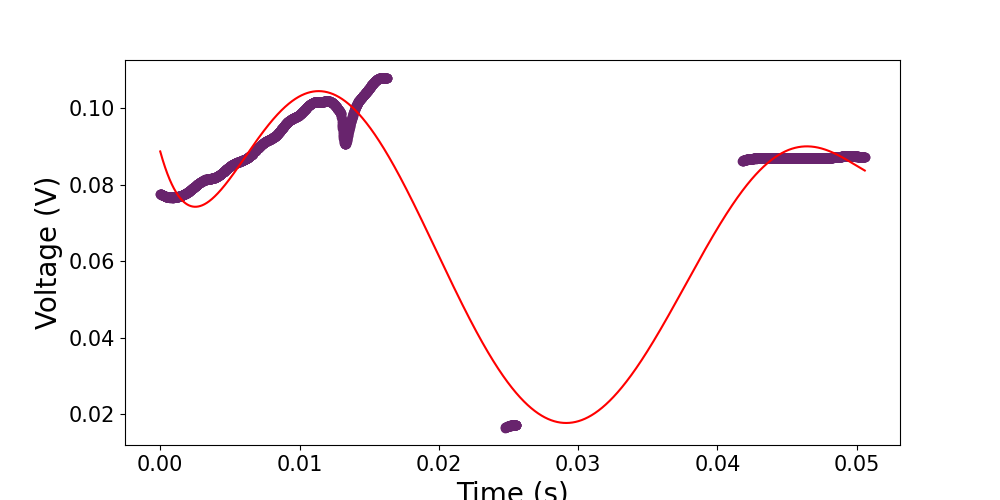

In [136]:
# Take data corresponding to off-resonant frequencies

transmission_a_memory_on = spectrum_memory_smooth_on[:point_A]
transmission_b_to_c_memory_on = spectrum_memory_smooth_on[point_B:point_C]
transmission_d_memory_on = spectrum_memory_smooth_on[point_D:]

# transmission_a_reference = Rb_spectrum_reference_cropped[:point_A, 1]
# transmission_b_to_c_reference = Rb_spectrum_reference_cropped[point_B:point_C, 1]
# transmission_d_to_e_reference = Rb_spectrum_reference_cropped[point_D:point_E, 1]
# transmission_f_reference = Rb_spectrum_reference_cropped[point_F:, 1]


# off_resonant_time_memory = np.concatenate([time_memory_cropped_on[:point_A], time_memory_cropped_on[point_D:]])
# off_resonant_transmission_memory = np.concatenate([transmission_a_memory_on, transmission_d_memory_on])

off_resonant_time_memory = np.concatenate([time_memory_cropped_on[:point_A], time_memory_cropped_on[point_B:point_C], time_memory_cropped_on[point_D:]])
off_resonant_transmission_memory = np.concatenate([spectrum_memory_smooth_on[:point_A], spectrum_memory_smooth_on[point_B:point_C], 
                                                   spectrum_memory_smooth_on[point_D:]])

# off_resonant_time_memory = time_memory_cropped_on[:point_A]
# off_resonant_transmission_memory = spectrum_memory_smooth_on[:point_A]







# Apply polyfit to off resonant data
p_memory = np.polyfit(off_resonant_time_memory, off_resonant_transmission_memory, 6)


# Plot polyfit
plt.figure(figsize=(10, 5))
plt.scatter(off_resonant_time_memory, off_resonant_transmission_memory)
plt.plot(time_memory_cropped_on, np.polyval(p_memory, time_memory_cropped_on), color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()







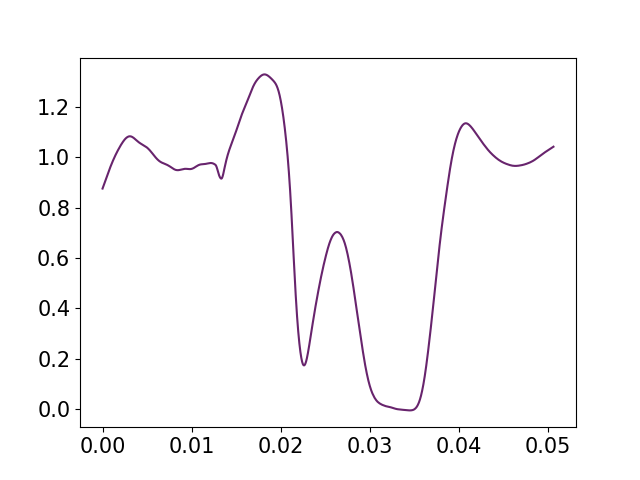

In [137]:
max_memory_spectrum = np.max(spectrum_memory_smooth)

spectrum_memory_norm_on = spectrum_memory_smooth_on/np.polyval(p_memory, time_memory_cropped_on)
# spectrum_memory_norm = spectrum_memory_smooth/max_memory_spectrum

# Rb_spectrum_memory_norm = Rb_spectrum_memory_smooth/interpolated_transmission

spectrum_memory_norm_on = signal.savgol_filter(spectrum_memory_norm_on, 50, 1)


plt.figure()
# plt.plot(Time_cropped, Rb_spectrum_memory_norm)
plt.plot(time_memory_cropped_on, spectrum_memory_norm_on)

plt.show()



# Save to csv with first column as frequency and second column as transmission
# np.savetxt('Data/elecsus_cells_66C1_1_normalised.csv', np.column_stack((freq_array, Rb_spectrum_memory_norm)), delimiter=',')
# np.savetxt('Data/elecsus_cells_66C1_4_normalised.csv', np.column_stack((freq_array, Rb_spectrum_reference_norm)), delimiter=',')

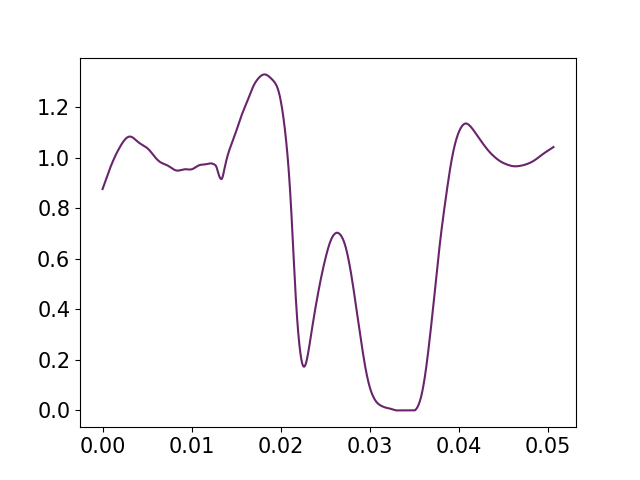

In [138]:
# Zero the dips
spectrum_memory_norm_on[np.where(spectrum_memory_norm_on <= 0)] = 0


plt.figure()
plt.plot(time_memory_cropped_on, spectrum_memory_norm_on)
plt.show()

In [139]:
# Fit ElecSus

import ElecSus_PQI.elecsus.elecsus_methods as EM

# Horizontal polarization
E_in=np.array([0,1,0])
E_in_angle = [E_in[0].real,[abs(E_in[1]),np.angle(E_in[1])]]
E_in=E_in_angle


# Cicular polarisation
# phase = np.pi
# E_in=np.array([1,1,0])
# E_in = [E_in[0], E_in[1]*np.exp(1.j*phase)]
# E_in_angle = [E_in[0].real,[abs(E_in[1]),np.angle(E_in[1])]]
# E_in = E_in_angle

groundPop = 0 # 0 for popShift, 1-7 for different F states. So far this is only hardcoded for Rb87

# Add Gaussian for insufficient linewidth pump
add_gaussian = False

# popShift denotes the shift in population. If positive, lowest F state population is increased, if negative, lowest F state population is decreased


# Initial values
T = 100
delta_T = 0.9 * T
p_dict = {'Elem':'Cs','Dline':'D2','T':T,'lcell':7.5e-3, 'shift':0, 'Btheta':0,'Bfield':0,
            'shift':0,'Bphi':0,'GammaBuf':0, 'DoppTemp': T, 'rb85frac': 2, 'Constrain':True, 'popShiftCs':0}
p_dict_guess=p_dict

p_dict_bools={'T':True, 'DoppTemp':False, 'shift':True, 'popShiftCs':True}

p_dict_bounds={}
p_dict_bounds['shift']=(-1000, 1000)
p_dict_bounds['T']=(T-delta_T, T+delta_T)
p_dict_bounds['popShiftCs']=(-9, 9)


# p_dict_bounds['DoppTemp']=(0, 40)


# Fit
best_params, RMS, result = EM.fit_data([freq_array_on*1e3, spectrum_memory_norm_on], p_dict_guess, p_dict_bools, groundPop, add_gaussian,
                                       E_in, p_dict_bounds, data_type='S0',fit_algorithm='ML')

report = result.fit_report()
elecsus_fit = result.best_fit
print(report)


[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 101
    # data points      = 3953
    # variables        = 3
    chi-square         = 102.259930
    reduced chi-square = 0.02588859
    Akaike info crit   = -14441.0771
    Bayesian info crit = -14422.2305
    R-squared          = 0.83426573
[[Variables]]
    E_x:           0 (fixed)
    E_y:           1 (fixed)
    E_phase:       0 (fixed)
    T:             142.606748 +/- 0.20459249 (0.14%) (init = 100)
    lcell:         0.0075 (fixed)
    Bfield:        0 (fixed)
    Btheta:        0 (fixed)
    Bphi:          0 (fixed)
    GammaBuf:      0 (fixed)
    shift:        -592.021081 +/- 9.61630728 (1.62%) (init = 0)
    groundPop:     0 (fixed)
    add_gaussian:  0 (fixed)
    popShift87:   -inf (fixed)
    popShift85:   -inf (fixed)
    popShiftCs:    8.57232814 +/- 0.02811488 (0.33%) (init = 0)
    sigma:        -inf (fixed)
    X0_shift:     -inf (fixed)
    gaussianPop:  -

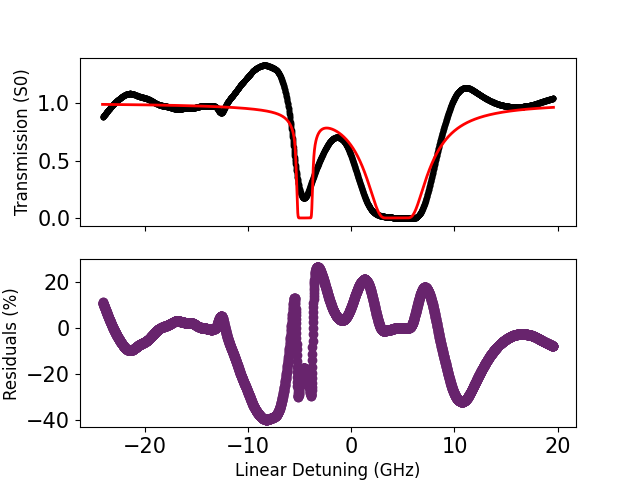

In [140]:


fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(freq_array_on,spectrum_memory_norm_on,'k.',label='Data')



ax[0].plot(freq_array_on,elecsus_fit,'r-',lw=2,label='Fit')
ax[1].set_xlabel('Linear Detuning (GHz)', fontsize=12)
ax[0].set_ylabel('Transmission (S0)', fontsize=12)
ax[1].scatter(freq_array_on,100*(elecsus_fit-((spectrum_memory_norm_on))))
ax[1].set_ylabel('Residuals (%)', fontsize=12)


# Save image 
# plt.savefig(path_to_data + f'I{I}_' + f'T{T}' + '.png')
# os.chdir('/home/otps3141/Documents/Dokumente/ETH QE/Master Thesis Imperial/Thesis/Code/ElecSus_fitting/Data/Pumping/Pulsed Pumping/AdjustedBeamWidth')
# os.system(f"pdftoppm {I}_{T}.pdf {I}_{T} -png")
# os.chdir(path)

plt.show()
